<a href="https://colab.research.google.com/github/ayoolafelix/DSN-BootCamp-Qualificaton/blob/master/DSN_Bootcamp_Qualification_2020_KNN_Tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AEpvIqFSD18UkBeLbpqiwGHXrhtj25pxnRAD5i_OPDdokpySa57ipo
Mounted at /content/gdrive


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
test = pd.read_csv('/content/gdrive/My Drive/DSN BootCamp Qualification/Test.csv')
train = pd.read_csv('/content/gdrive/My Drive/DSN BootCamp Qualification/Train.csv')
sample = pd.read_csv('/content/gdrive/My Drive/DSN BootCamp Qualification/SampleSubmission.csv')

In [14]:
train.set_index(train.columns[0], inplace = True)
test.set_index(test.columns[0], inplace = True)

In [15]:
print('Train dataset has {} entries and {} features'.format(train.shape[0], train.shape[1]))
print('Test dataset has {} entries and {} features'.format(test.shape[0], test.shape[1]))
print("We are predicting '{}'".format(train.columns[-1]))

Train dataset has 56000 entries and 51 features
Test dataset has 24000 entries and 50 features
We are predicting 'default_status'


In [16]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
Applicant_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.24,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.00,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.19,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no


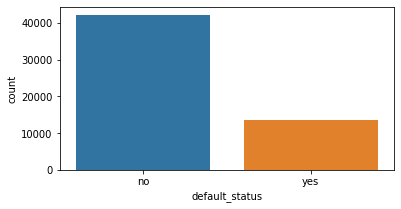

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(x= train.columns[-1] ,data=train)
plt.show()

In [21]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, unique numbers, datatypes etc.
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total', 'Percent','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [22]:
quality_report(train)

,Total,Percent,Nunique,Dtype
form_field40,43729,78.087500,9848,float64
form_field31,39408,70.371429,394,float64
form_field41,38229,68.266071,14375,float64
form_field11,31421,56.108929,9508,float64
form_field45,31317,55.923214,6,float64
form_field23,28123,50.219643,16619,float64
form_field30,25509,45.551786,274,float64
form_field35,23148,41.335714,11,float64
form_field15,22475,40.133929,23783,float64
form_field48,20889,37.301786,32115,float64


In [24]:
test[train.columns[-1]] = 'test' #for easy separation

# Combine train and test to avoid repetition
data = pd.concat([train, test]).reset_index(drop=True)

In [25]:
print('Combined dataset has {} entries and {} features'.format(data.shape[0], data.shape[1]))

Combined dataset has 80000 entries and 51 features


In [26]:
missing_col = data.columns[data.isna().any()]
missing_col

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field31', 'form_field32', 'form_field33',
       'form_field34', 'form_field35', 'form_field36', 'form_field37',
       'form_field38', 'form_field39', 'form_field40', 'form_field41',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50'],
      dtype='object')

In [27]:
for col in missing_col:
    
    data[col].fillna(data[col].mean(), inplace = True)

In [28]:
missing_col = data.columns[data.isna().any()]
missing_col

Index([], dtype='object')

count    53471.000000
mean      3491.795665
std        188.462426
min       2990.000000
25%       3358.000000
50%       3484.000000
75%       3620.000000
max       3900.000000
Name: form_field1, dtype: float64


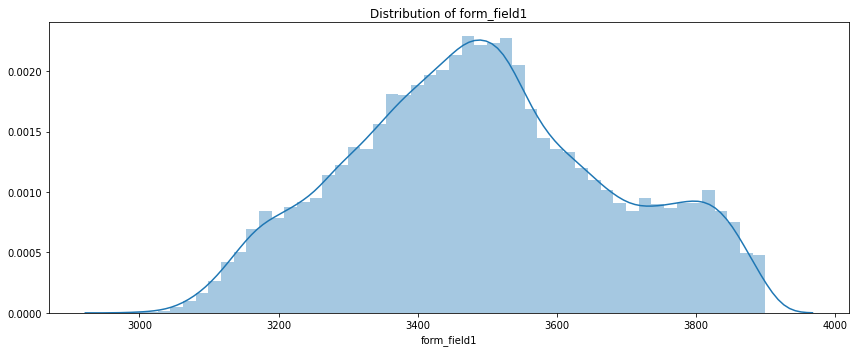

count    52156.000000
mean         0.550737
std          0.820979
min          0.000000
25%          0.070788
50%          0.267575
75%          0.719512
max         18.015050
Name: form_field2, dtype: float64


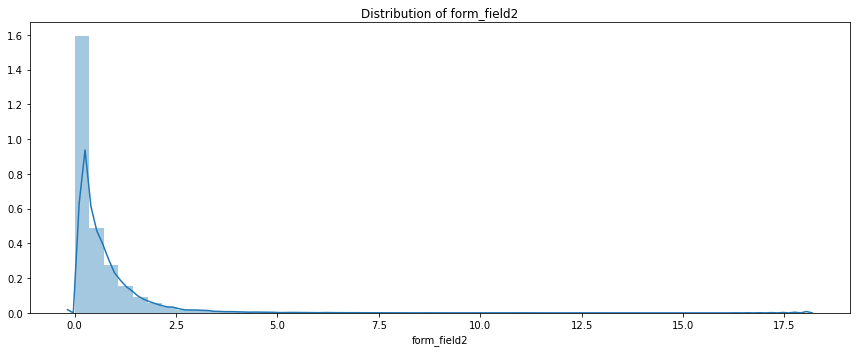

count    55645.000000
mean         1.052225
std          2.147768
min          0.000000
25%          0.000000
50%          0.062000
75%          1.282000
max         57.371600
Name: form_field3, dtype: float64


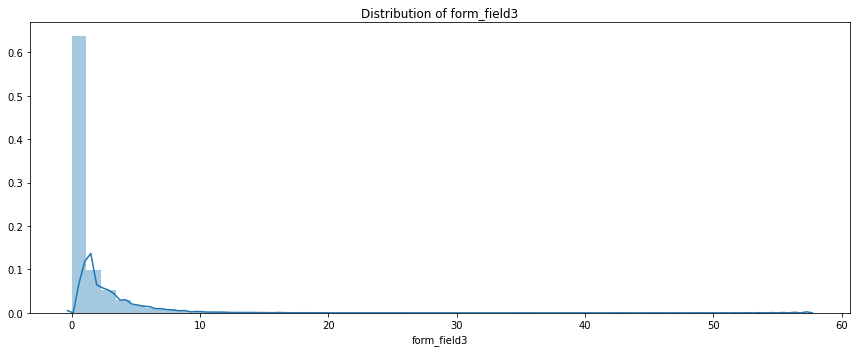

count    55645.000000
mean         0.851979
std          3.157692
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         91.672200
Name: form_field4, dtype: float64


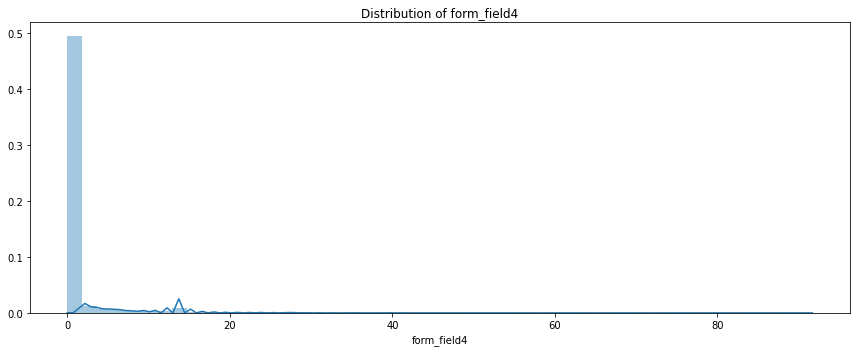

count    55645.000000
mean         1.956317
std         10.512396
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        407.748600
Name: form_field5, dtype: float64


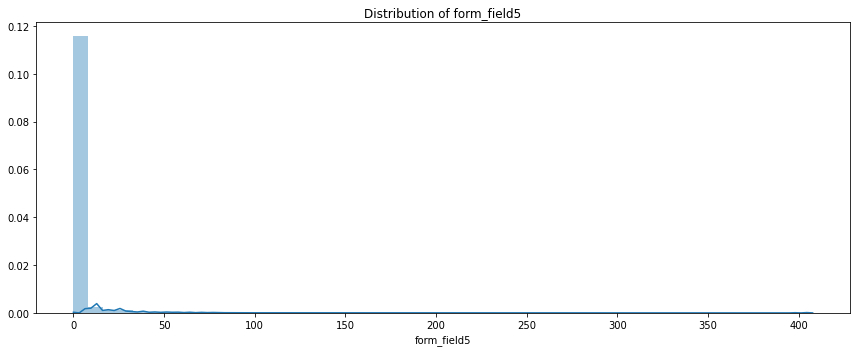

count    4.264000e+04
mean     6.244479e+05
std      1.433422e+06
min      0.000000e+00
25%      1.400400e+04
50%      1.155330e+05
75%      5.259280e+05
max      5.313546e+07
Name: form_field6, dtype: float64


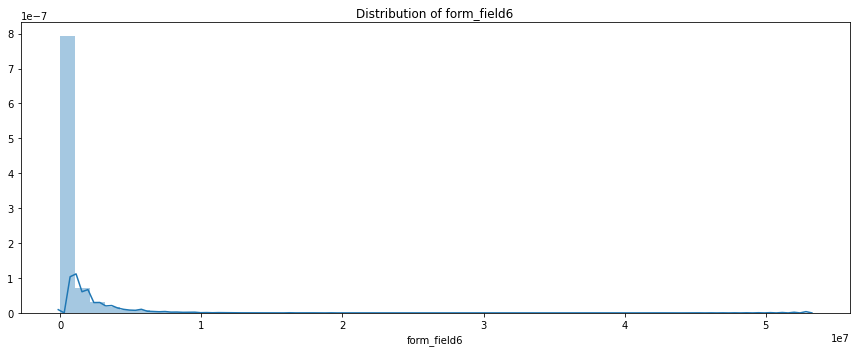

count    5.083700e+04
mean     6.865210e+06
std      1.912729e+07
min      0.000000e+00
25%      6.869740e+05
50%      2.704328e+06
75%      6.993831e+06
max      2.158794e+09
Name: form_field7, dtype: float64


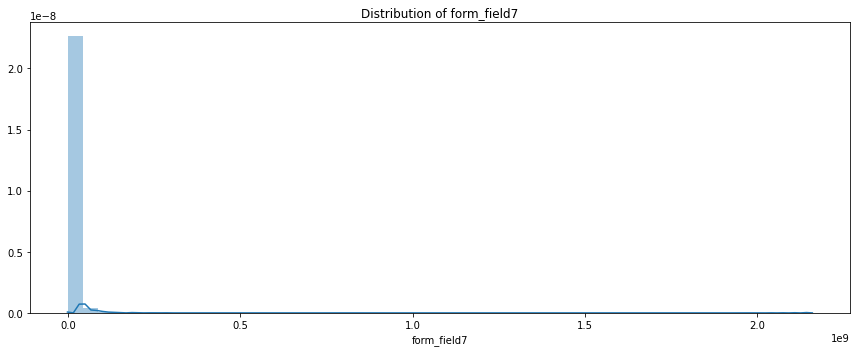

count    4.264000e+04
mean     2.626690e+06
std      3.927355e+06
min      0.000000e+00
25%      1.929440e+05
50%      9.639420e+05
75%      3.751516e+06
max      1.037397e+08
Name: form_field8, dtype: float64


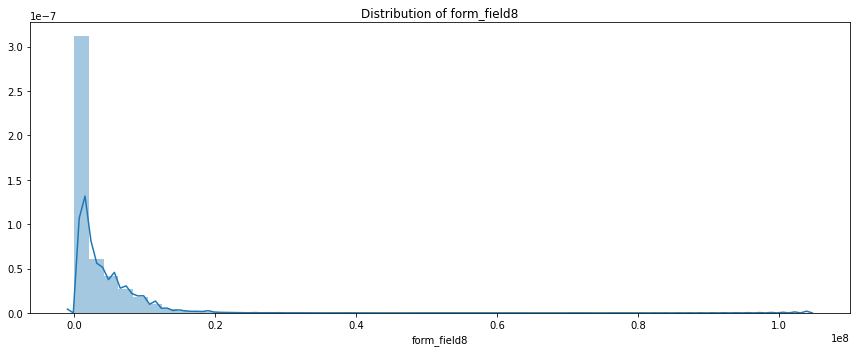

count    4.799200e+04
mean     1.316002e+07
std      1.977963e+07
min      0.000000e+00
25%      1.368502e+06
50%      5.506295e+06
75%      1.694552e+07
max      3.200533e+08
Name: form_field9, dtype: float64


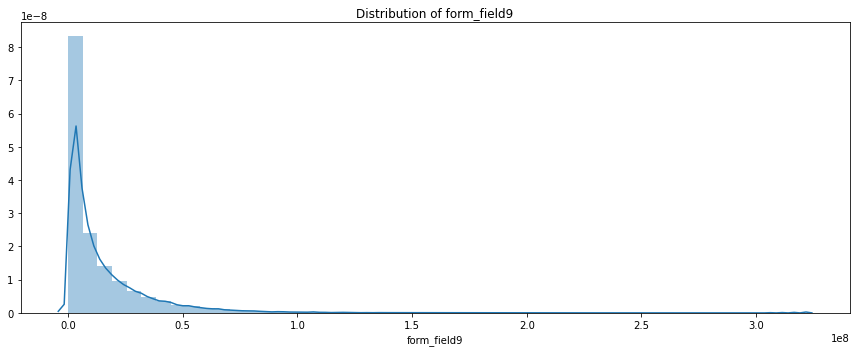

count    5.564500e+04
mean     1.185585e+07
std      2.669459e+07
min      0.000000e+00
25%      4.500730e+05
50%      3.707559e+06
75%      1.326101e+07
max      2.191361e+09
Name: form_field10, dtype: float64


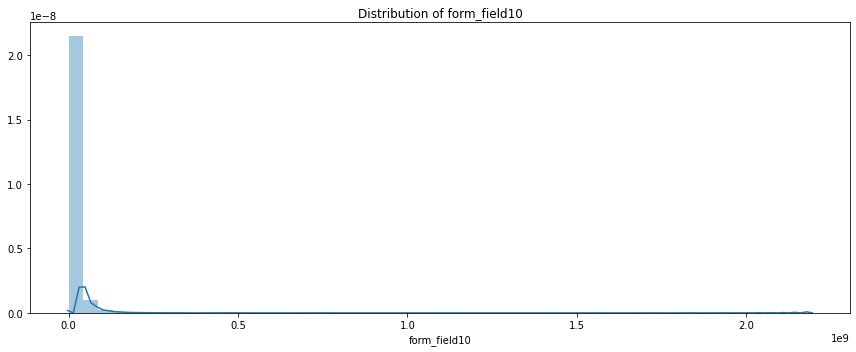

count    2.457900e+04
mean     2.054715e+06
std      4.912980e+06
min      0.000000e+00
25%      2.172565e+05
50%      6.986440e+05
75%      1.964839e+06
max      1.707430e+08
Name: form_field11, dtype: float64


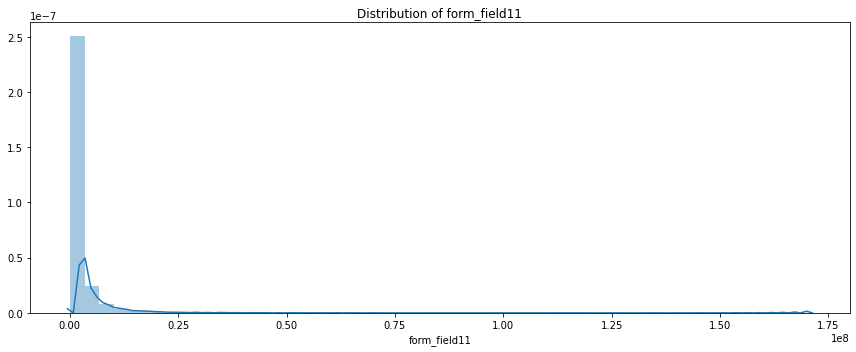

count    4.610500e+04
mean     2.771113e+06
std      4.544838e+06
min      0.000000e+00
25%      2.758010e+05
50%      1.163110e+06
75%      3.360182e+06
max      1.240439e+08
Name: form_field12, dtype: float64


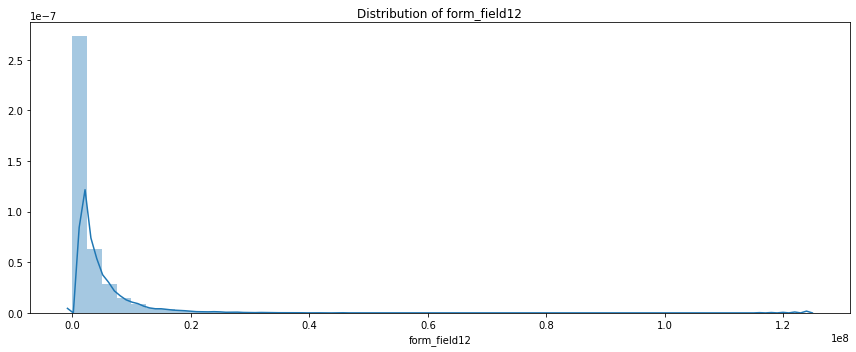

count    5.011100e+04
mean     6.009944e+06
std      2.335893e+07
min      0.000000e+00
25%      1.921660e+05
50%      1.605792e+06
75%      5.593626e+06
max      2.457824e+09
Name: form_field13, dtype: float64


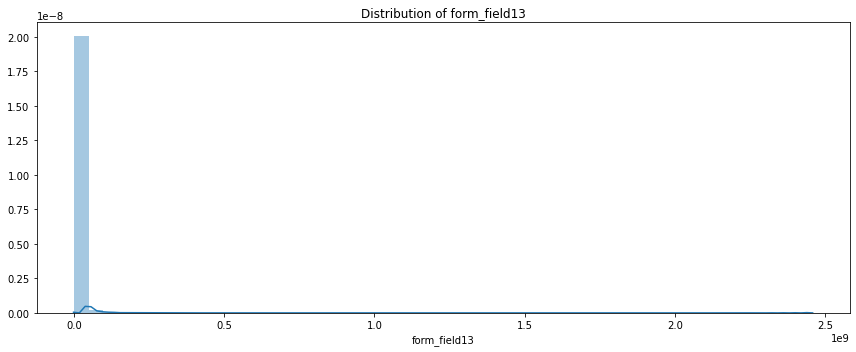

count    5.600000e+04
mean     6.914875e+07
std      2.713995e+09
min      0.000000e+00
25%      1.657646e+07
50%      2.814143e+07
75%      4.818738e+07
max      3.854990e+11
Name: form_field14, dtype: float64


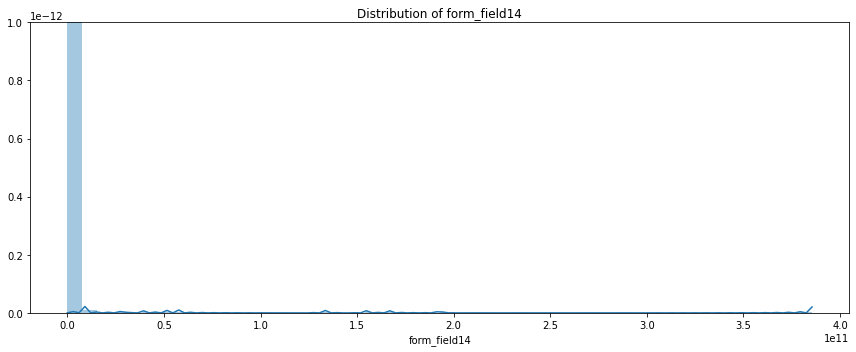

count    3.352500e+04
mean     1.145041e+08
std      1.153842e+08
min      5.395430e+05
25%      5.007636e+07
50%      8.442428e+07
75%      1.428735e+08
max      3.456119e+09
Name: form_field15, dtype: float64


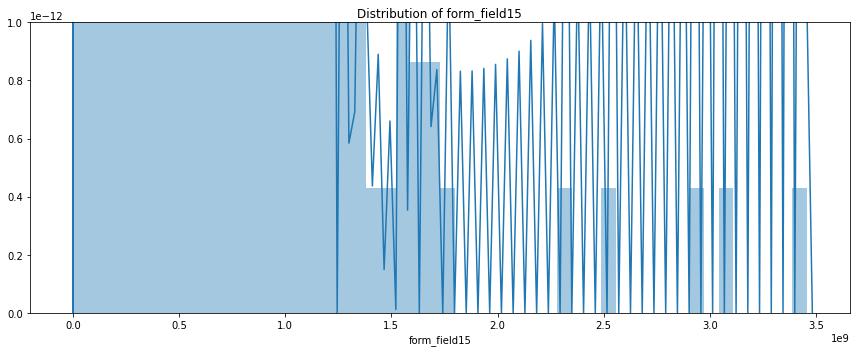

count    42964.000000
mean         0.230425
std          0.621833
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: form_field16, dtype: float64


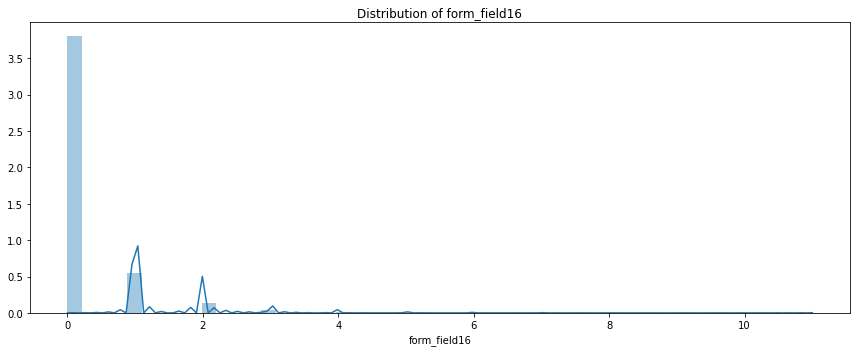

count    44849.000000
mean         0.265692
std          0.720198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: form_field17, dtype: float64


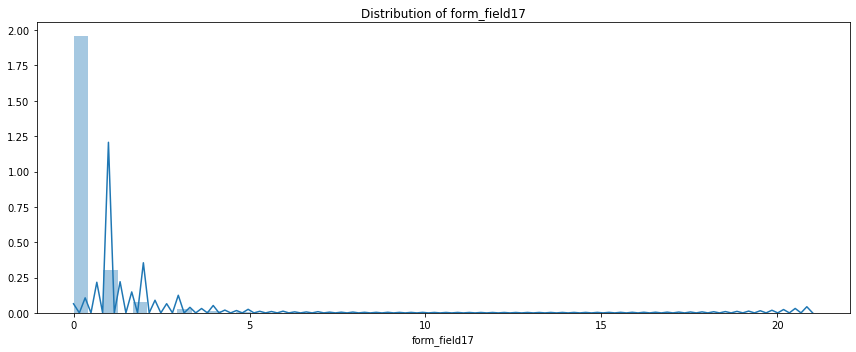

count    45598.000000
mean         0.271832
std          0.725434
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: form_field18, dtype: float64


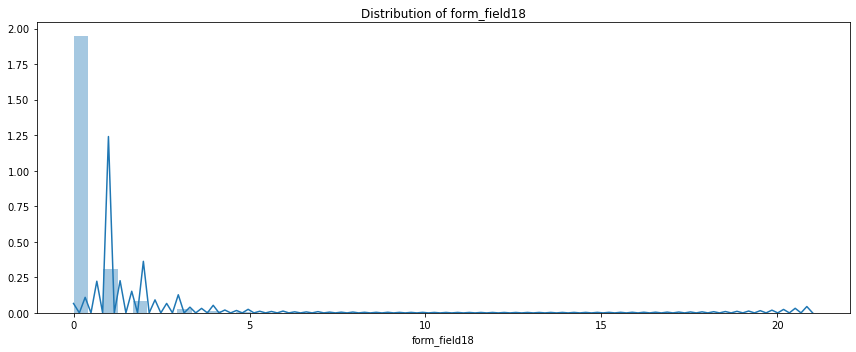

count    55996.000000
mean         0.948800
std          1.736454
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         28.000000
Name: form_field19, dtype: float64


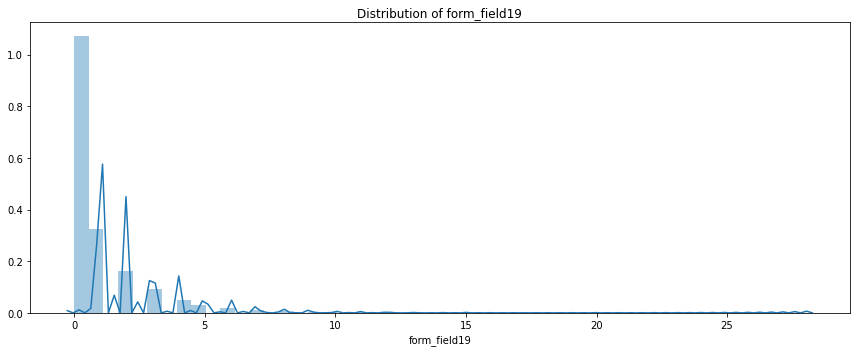

count    55645.000000
mean         1.031593
std          1.785122
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         29.000000
Name: form_field20, dtype: float64


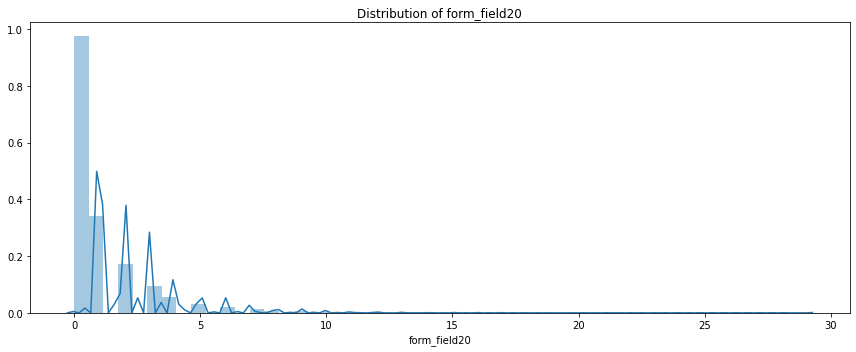

count    40146.000000
mean        86.500380
std         53.445528
min          0.255000
25%         40.305000
50%         89.167500
75%        129.892500
max       1957.875000
Name: form_field21, dtype: float64


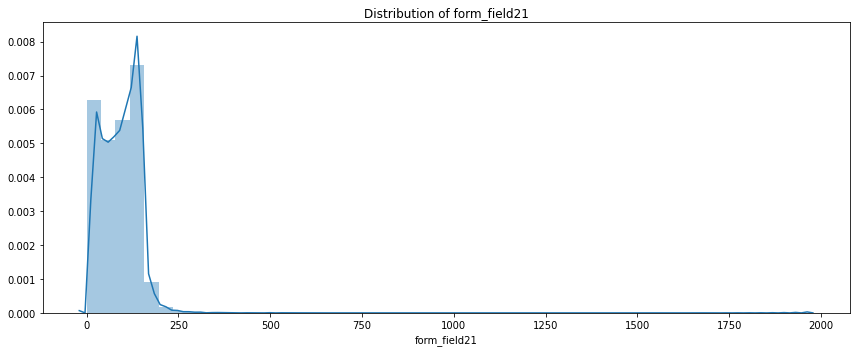

count    35600.000000
mean      6628.316381
std       5661.059297
min          0.000000
25%       1068.667500
50%       5976.225000
75%      11354.171250
max      97200.000000
Name: form_field22, dtype: float64


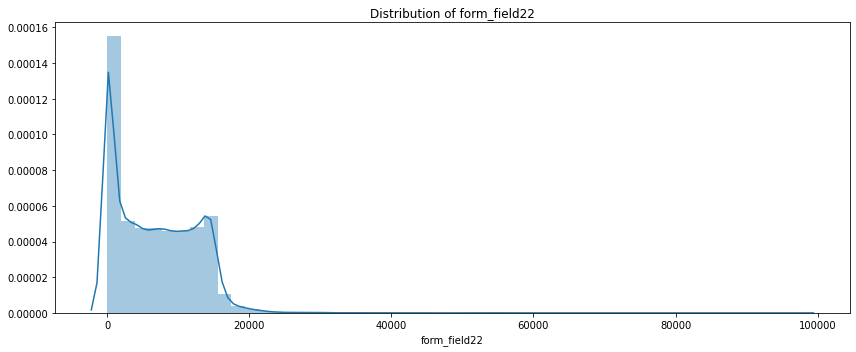

count    27877.000000
mean      6452.875072
std       5739.968774
min          0.000000
25%        797.145000
50%       5548.935000
75%      11280.000000
max      97200.000000
Name: form_field23, dtype: float64


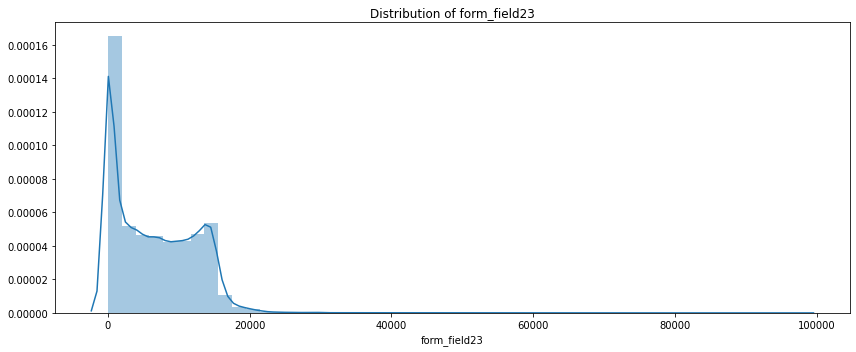

count    42703.000000
mean       104.558516
std        436.670719
min          0.000000
25%         14.865000
50%         60.660000
75%        114.712500
max      31863.750000
Name: form_field24, dtype: float64


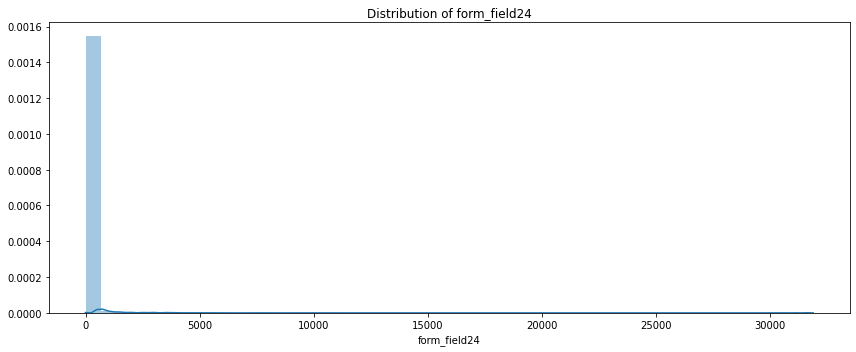

count    50550.000000
mean      2624.555935
std       1964.226548
min          0.000000
25%       1231.500000
50%       2203.500000
75%       3517.500000
max      25093.500000
Name: form_field25, dtype: float64


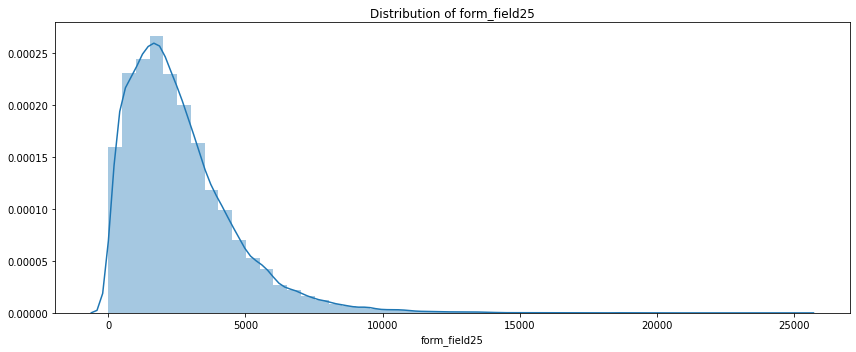

count    48562.000000
mean     10106.554899
std       8796.472481
min          0.000000
25%       3375.000000
50%       8214.000000
75%      14145.000000
max      73275.000000
Name: form_field26, dtype: float64


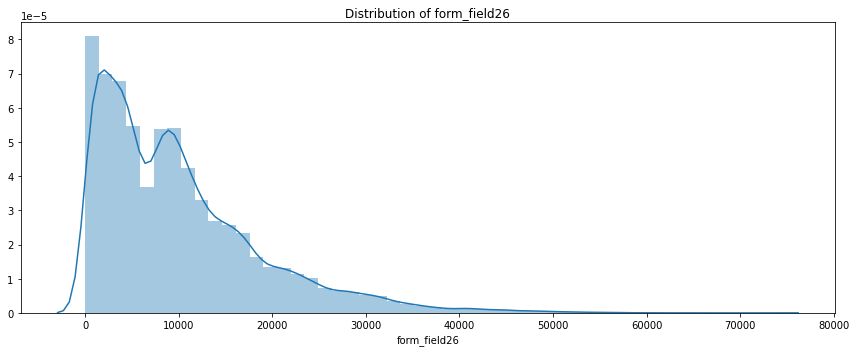

count    46701.000000
mean      6190.516948
std       5390.915344
min          0.000000
25%       2068.000000
50%       5110.000000
75%       8700.000000
max      42522.000000
Name: form_field27, dtype: float64


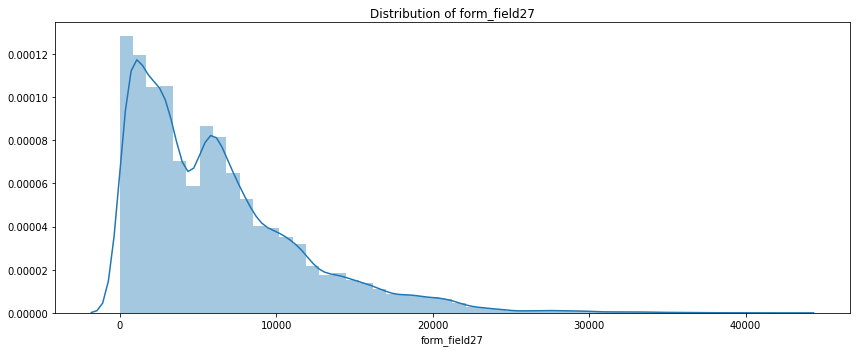

count    55645.000000
mean     17274.315141
std      26930.742020
min          0.000000
25%         60.000000
50%        486.000000
75%      60772.000000
max      60772.000000
Name: form_field28, dtype: float64


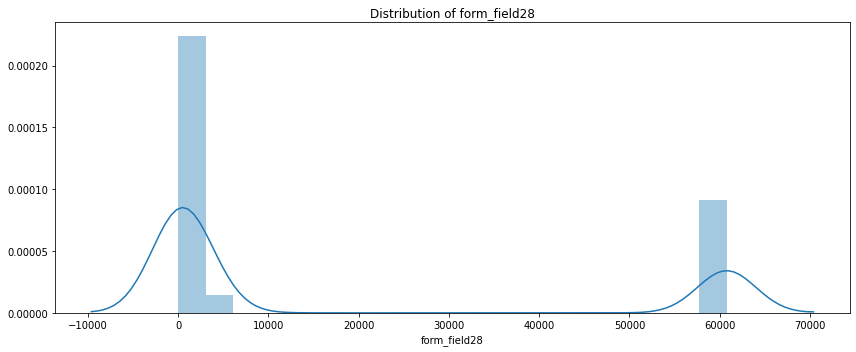

count    55645.000000
mean     16518.540695
std       9666.183962
min          0.000000
25%       9765.000000
50%      15057.000000
75%      21810.000000
max      73914.000000
Name: form_field29, dtype: float64


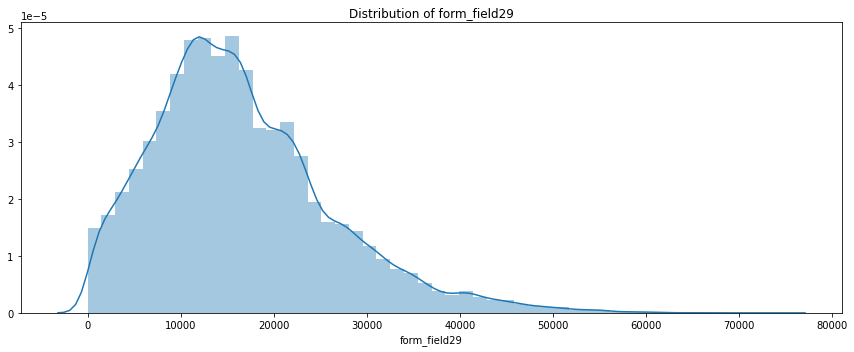

count    30491.000000
mean      5213.246663
std       3124.491488
min          0.000000
25%       2312.000000
50%       5658.000000
75%       7726.000000
max      25550.000000
Name: form_field30, dtype: float64


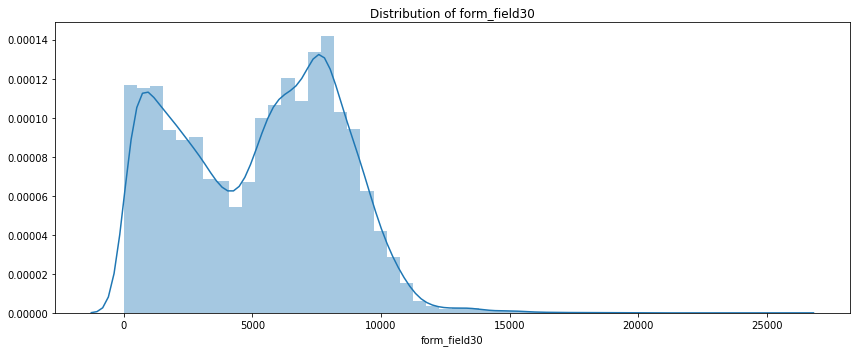

count    16592.000000
mean     10857.565755
std       6049.678489
min          0.000000
25%       6297.000000
50%      10584.000000
75%      14235.000000
max      47085.000000
Name: form_field31, dtype: float64


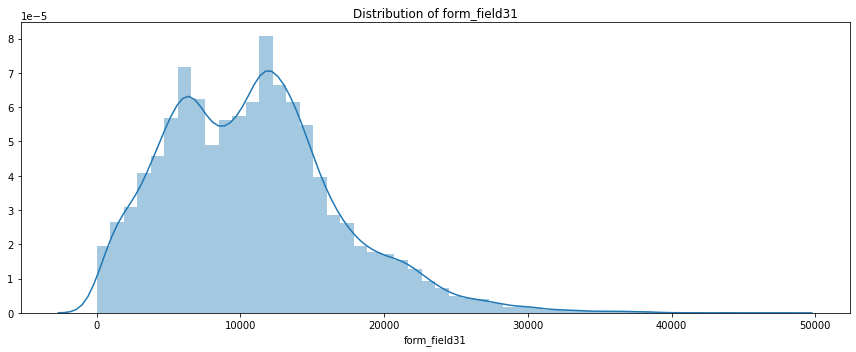

count    50550.000000
mean       938.345321
std       1044.597044
min          0.000000
25%        194.000000
50%        598.000000
75%       1332.000000
max      21306.000000
Name: form_field32, dtype: float64


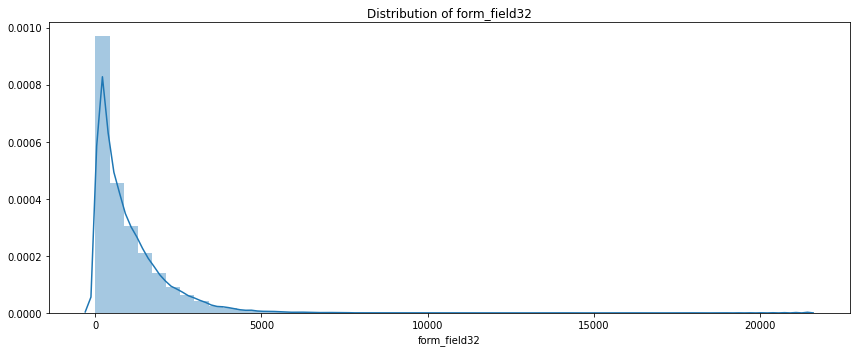

count    54744.000000
mean        13.926583
std         15.208396
min          0.166600
25%          2.333400
50%          7.833400
75%         21.166600
max        152.000000
Name: form_field33, dtype: float64


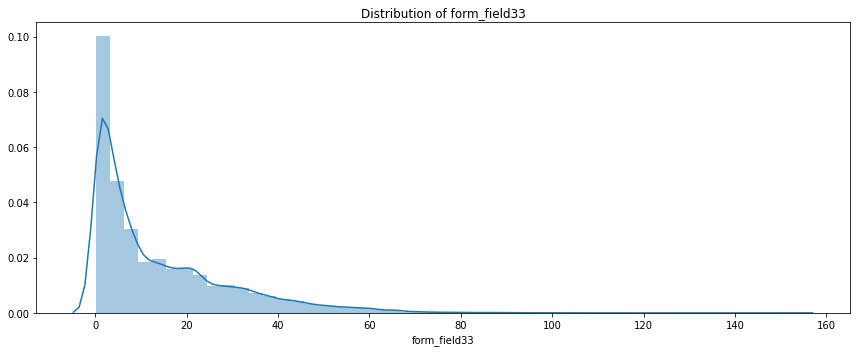

count    55645.000000
mean         0.230245
std          0.683063
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: form_field34, dtype: float64


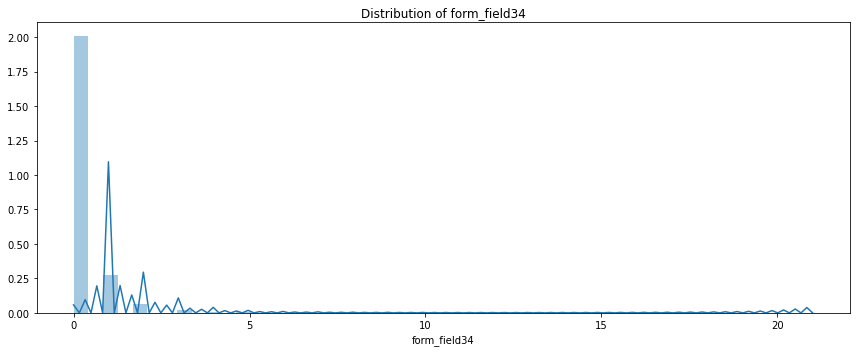

count    32852.000000
mean         0.199866
std          0.574002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: form_field35, dtype: float64


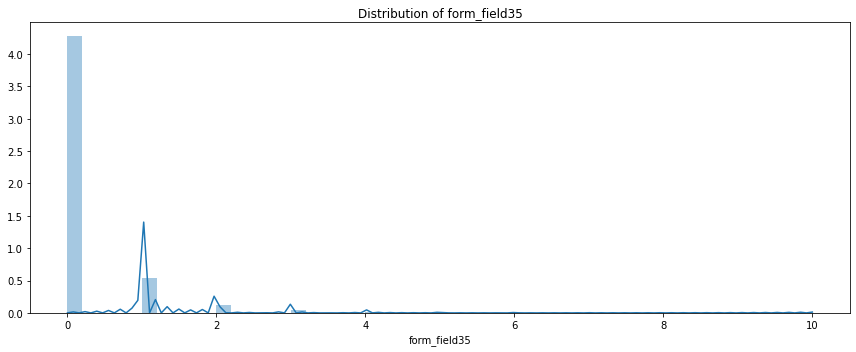

count    54005.000000
mean        12.859069
std         10.621984
min          2.000000
25%          6.000000
50%         10.000000
75%         16.000000
max        200.000000
Name: form_field36, dtype: float64


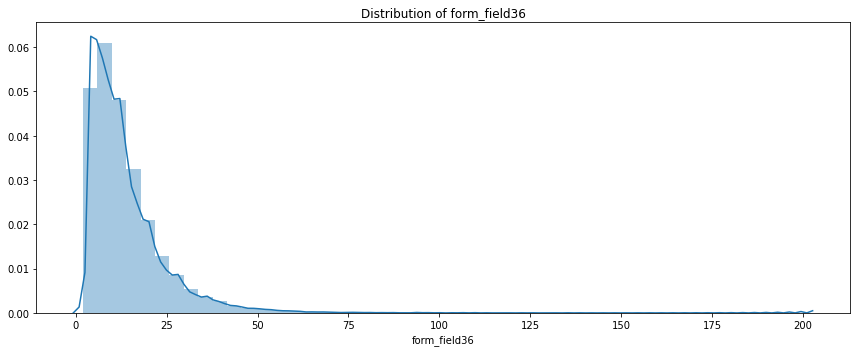

count    50550.000000
mean         8.480435
std          9.328810
min          0.000000
25%          2.000000
50%          6.000000
75%         12.000000
max        106.000000
Name: form_field37, dtype: float64


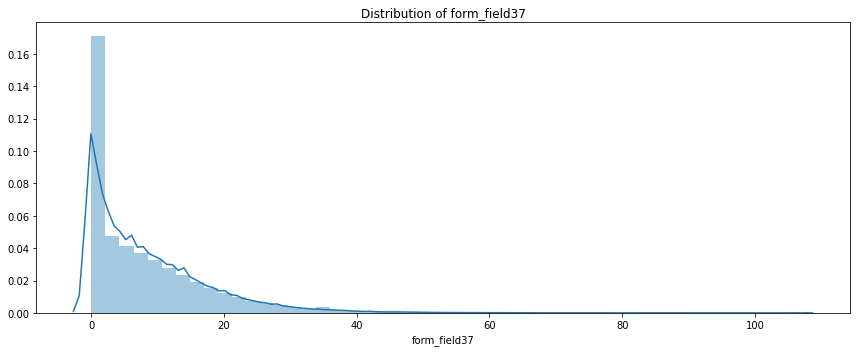

count    55645.000000
mean         8.601420
std          7.969215
min          0.000000
25%          4.000000
50%          6.000000
75%         12.000000
max        156.000000
Name: form_field38, dtype: float64


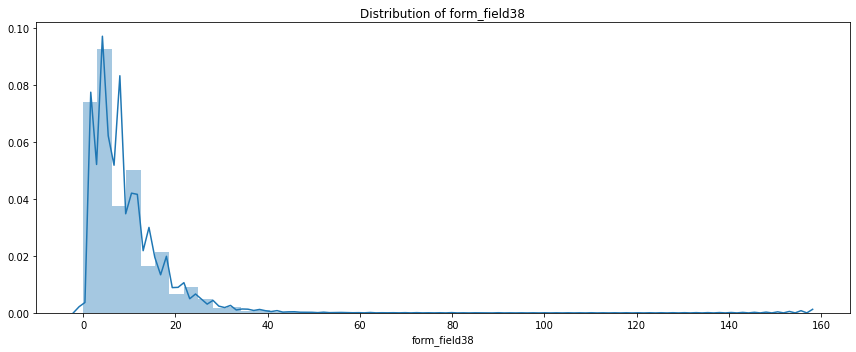

count    51789.000000
mean         0.090849
std          0.423802
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: form_field39, dtype: float64


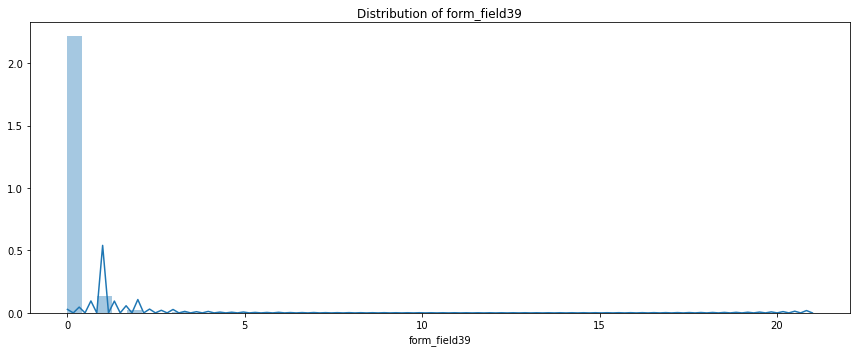

count    12271.000000
mean       147.797977
std         45.085889
min          0.021000
25%        136.191750
50%        150.000000
75%        167.754000
max        645.450000
Name: form_field40, dtype: float64


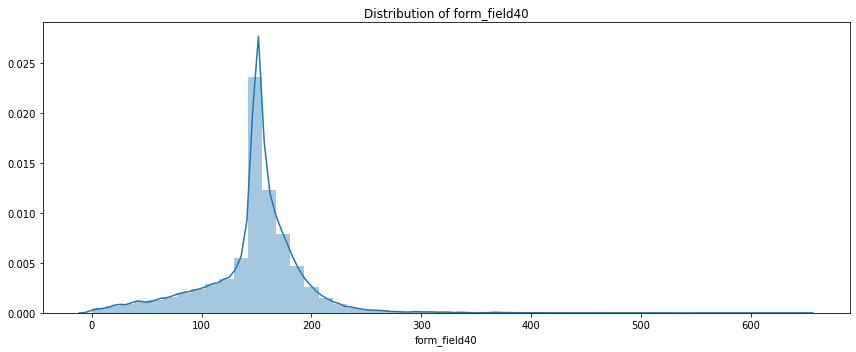

count    17771.000000
mean       108.117363
std         36.765769
min          0.000000
25%         87.055500
50%        118.441500
75%        137.496750
max        255.000000
Name: form_field41, dtype: float64


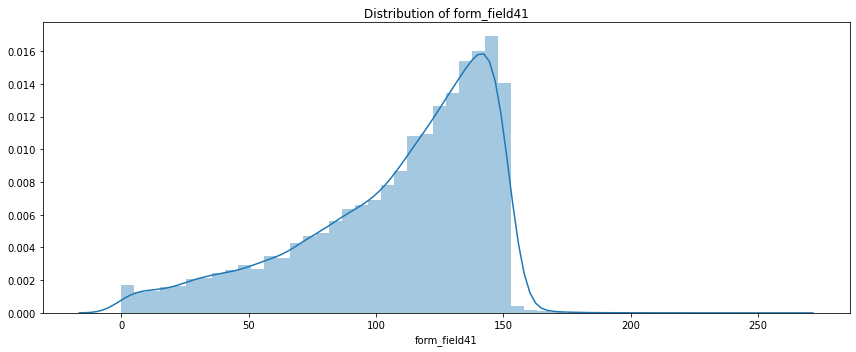

count    54677.000000
mean         0.368215
std          0.412858
min          0.000000
25%          0.000000
50%          0.220000
75%          0.628573
max          2.200000
Name: form_field42, dtype: float64


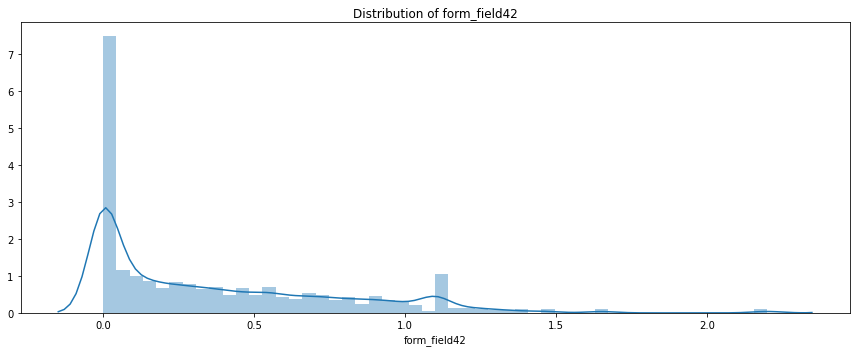

count    55432.000000
mean         6.634511
std          6.378946
min          0.000000
25%          2.020000
50%          5.050000
75%         10.100000
max         91.910000
Name: form_field43, dtype: float64


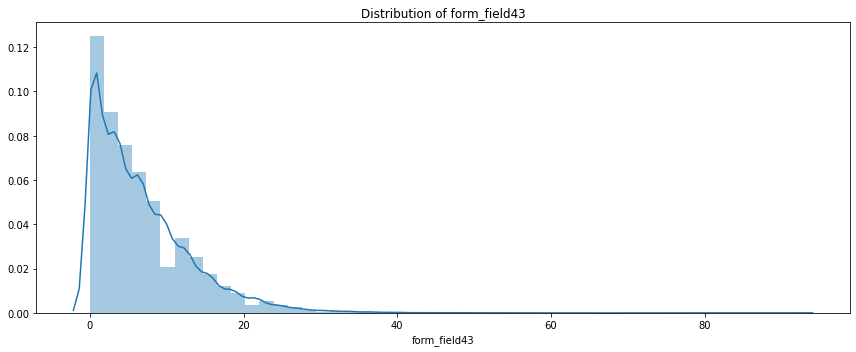

count    50617.000000
mean         0.563377
std          0.196973
min          0.048528
25%          0.411672
50%          0.588648
75%          0.753840
max          0.800000
Name: form_field44, dtype: float64


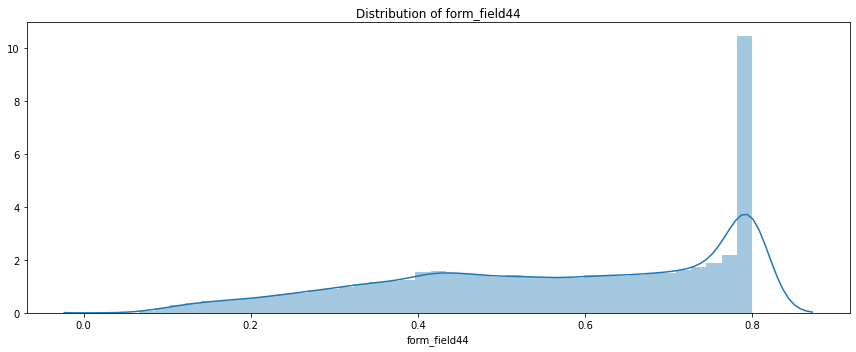

count    24683.000000
mean         0.072520
std          0.291146
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: form_field45, dtype: float64


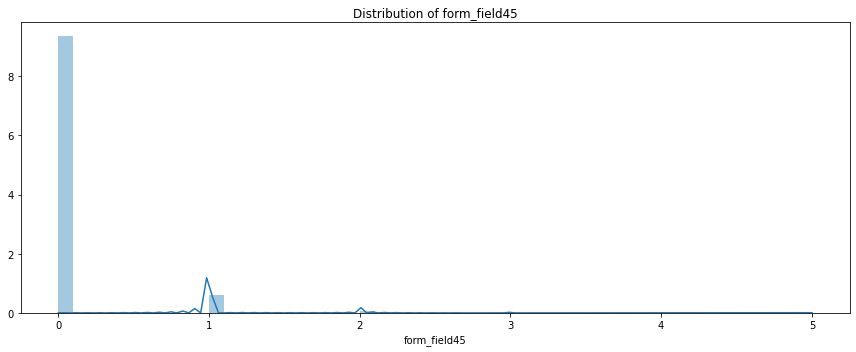

count    40096.000000
mean         0.095371
std          0.335210
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: form_field46, dtype: float64


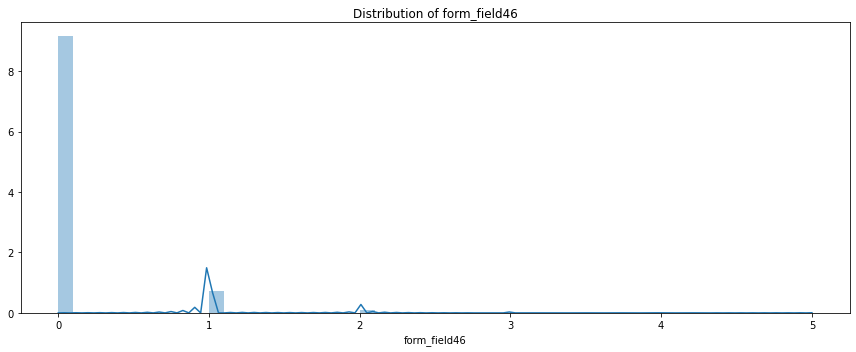

count    3.511100e+04
mean     3.052449e+05
std      1.647757e+06
min      0.000000e+00
25%      7.710079e+01
50%      3.181243e+02
75%      1.153022e+03
max      5.321014e+07
Name: form_field48, dtype: float64


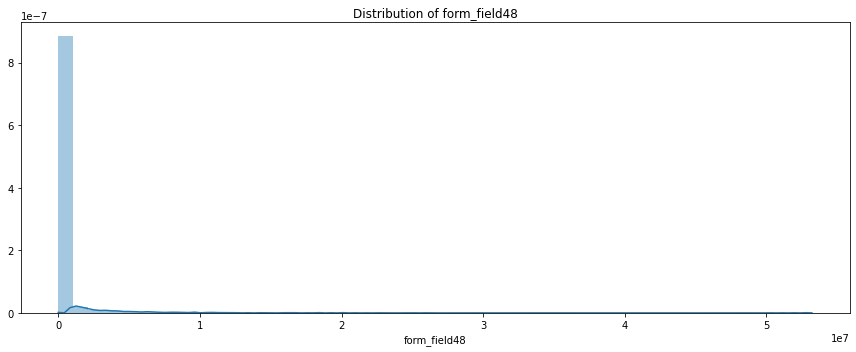

count    55645.000000
mean         1.049061
std          1.806160
min          0.000000
25%          0.000000
50%          0.000000
75%          1.181754
max         28.000000
Name: form_field49, dtype: float64


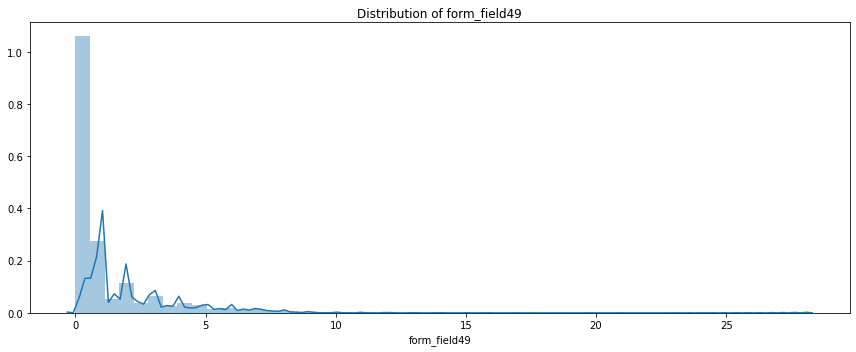

count    4.494400e+04
mean     6.005862e+05
std      5.842405e+06
min      0.000000e+00
25%      4.560141e-02
50%      1.703996e-01
75%      4.993370e-01
max      2.307571e+08
Name: form_field50, dtype: float64


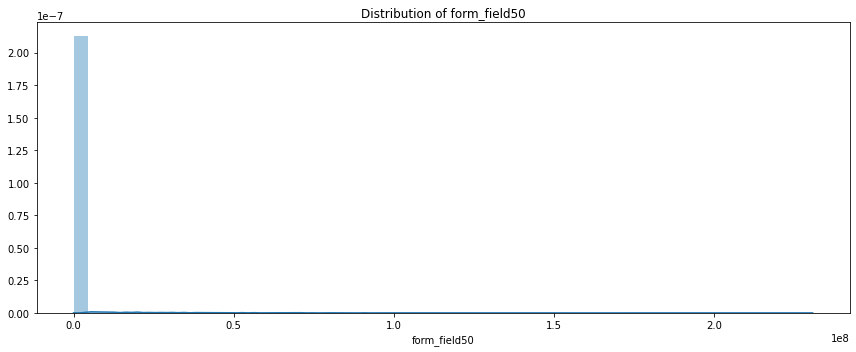

In [29]:
numeric_distribution_plot(train.drop(train.columns[-1], axis=1))

In [30]:
from scipy.stats import skew,norm  # for some statistics

In [32]:
numeric = data.select_dtypes(include='number').columns
skew_features = data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 44 numerical features with Skew > 0.5 :


form_field14    105.896380
form_field13     51.465922
form_field24     41.689452
form_field7      33.476509
form_field48     19.920435
form_field50     17.353849
form_field11     15.572524
form_field10     15.454673
form_field39     11.595155
form_field5      10.197799
dtype: float64

In [33]:
for column in skew_index:
    data[column] = np.log1p(data[column])

In [34]:
data = pd.get_dummies(columns= ["form_field47"], data = data)

In [35]:
quality_report(data)

,Total,Percent,Nunique,Dtype
form_field47_lending,0,0.0,2,uint8
form_field47_charge,0,0.0,2,uint8
form_field24,0,0.0,14050,float64
form_field23,0,0.0,22455,float64
form_field22,0,0.0,32337,float64
form_field21,0,0.0,11797,float64
form_field20,0,0.0,29,float64
form_field19,0,0.0,27,float64
form_field18,0,0.0,17,float64
form_field17,0,0.0,16,float64


In [36]:
train = data[:56000]
test = data[56000:]

In [50]:
X = train.drop('default_status', axis = 1)
y = train['default_status']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y,  random_state=42)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [73]:
y_pred = knn.predict(X_test)

In [74]:
print('Test set score: {:.2f}'.format(np.mean(y_pred == y_test)))

Test set score: 0.71


In [85]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : [i for i in range(50,1000,5)],
    'weights':['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'] 
}

gs = GridSearchCV( 
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 10,
    n_jobs = -1
)

gs_pred = gs.fit(X_train, y_train)

Fitting 10 folds for each of 760 candidates, totalling 7600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 38.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 62.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 92.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 131.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 172.1min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 207.6min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 263.0min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 336.0min
[Parallel(n_jobs=-1)]: Done 7600 out of 7600 | elapsed: 363.5min finished


In [86]:
gs_pred.best_score_
gs_pred.best_estimator_
gs_pred.best_params_

{'metric': 'manhattan', 'n_neighbors': 60, 'weights': 'distance'}

In [88]:
gs_pred.best_score_

0.7892857142857144

In [89]:
test_x = test.drop('default_status', axis = 1)

In [90]:
prediction = gs.predict(test_x)

In [91]:
sample['default_status'] = prediction
sample.to_csv('submission.csv', index =False)